# 📂 Project: COVID-19 Data Analysis and Visualization

### 1. Install Necessary Libraries

In [1]:
# pip install -r requirements.txt

### 2. Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### 3. Load Dataset

In [3]:
covid_df = pd.read_csv("./data/owid-covid-data.csv")

In [4]:
# Preview the data
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


### 4. Basic Exploration

In [5]:
# Check the structure
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [6]:
# Summary statistics
covid_df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,835.514313,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,1134.932671,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,24.568000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,295.089000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,1283.817000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000


In [7]:
# Check missing values
covid_df.isnull().sum().sort_values(ascending=False).head()

weekly_icu_admissions                   418442
weekly_icu_admissions_per_million       418442
excess_mortality                        416024
excess_mortality_cumulative_absolute    416024
excess_mortality_cumulative             416024
dtype: int64

In [8]:
# Backup of original dataset
df = covid_df.copy()

### 5. Data Cleaning
Focus on important columns:  
[`'location'`,
`'date'`,
`'total_cases'`,
`'new_cases'`,
`'total_deaths'`,
`'new_deaths'`,
`'people_vaccinated'`,
`'people_fully_vaccinated'`,
`'population'`]

In [9]:
# Select only the essential columns needed for analysis
df = df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'people_vaccinated', 'people_fully_vaccinated', 'population']]

# Convert the 'date' column from string to datetime format for easier time-based operations
df['date'] = pd.to_datetime(df['date'])

# Drop rows where 'total_cases' or 'total_deaths' are missing, as these are critical for analysis
df = df.dropna(subset=['total_cases', 'total_deaths'])

# Define a list of continent and world-level entries to exclude
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'North America', 'Oceania', 'South America', 'World']

# Remove rows where the 'location' is a continent or 'World', keeping only country-level data
df = df[~df['location'].isin(continents)]

# Display the first few rows of the cleaned dataset
df.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,population
0,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,NaN,NaN,41128772
1,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,NaN,NaN,41128772
2,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,NaN,NaN,41128772
3,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,NaN,NaN,41128772
4,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,NaN,NaN,41128772


### 6. Latest Data Snapshot

In [10]:
# After creating latest_df
latest_df = df.sort_values('date').groupby('location').tail(1)

# Drop missing values for total_cases and total_deaths from latest_df
latest_df = latest_df.dropna(subset=['total_cases', 'total_deaths'])

# safely sort and display
latest_df[['location', 'total_cases', 'total_deaths', 'people_vaccinated', 'people_fully_vaccinated']].sort_values('total_cases', ascending=False).head(10)


,location,total_cases,total_deaths,people_vaccinated,people_fully_vaccinated
166872,High-income countries,429044049.0,2997359.0,NaN,NaN
409811,Upper-middle-income countries,251753518.0,2824452.0,NaN,NaN
123276,European Union (27),185822587.0,1262988.0,NaN,NaN
405124,United States,103436829.0,1193165.0,NaN,NaN
75343,China,99373219.0,122304.0,NaN,NaN
222800,Lower-middle-income countries,91954400.0,1188026.0,NaN,NaN
175222,India,45041748.0,533623.0,1.027439e+09,951990527.0
132040,France,38997490.0,168091.0,NaN,NaN
142084,Germany,38437756.0,174979.0,NaN,NaN
51907,Brazil,37511921.0,702116.0,NaN,NaN


## Data Visualization

### 10 Most Important Questions + Solutions

📌 1. Which countries have the highest total COVID-19 cases?

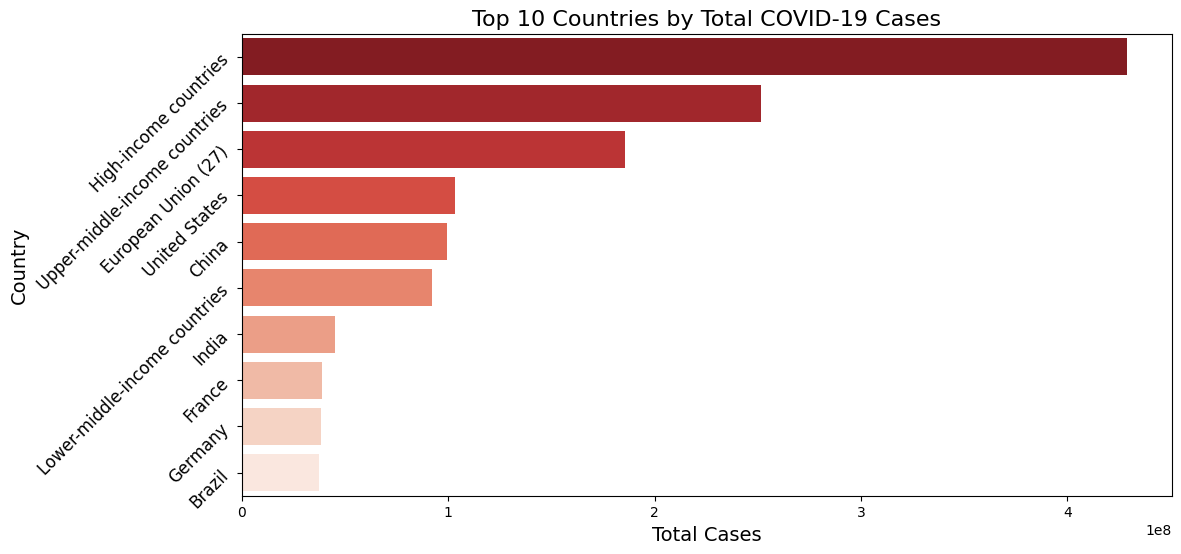

In [11]:
# Sort the latest data by 'total_cases' in descending order and select the top 10 countries
top10_cases = latest_df.sort_values('total_cases', ascending=False).head(10)

# Set the figure size for the plot
plt.figure(figsize=(12,6))

# Create a horizontal barplot showing total COVID-19 cases for the top 10 countries
sns.barplot(x='total_cases', y='location', data=top10_cases, palette='Reds_r')

# Set the title and axis labels with font sizes
plt.title("Top 10 Countries by Total COVID-19 Cases", fontsize=16)
plt.xlabel("Total Cases", fontsize=14)
plt.ylabel("Country", fontsize=14)

# Rotate the country names (y-axis labels) by 45 degrees for better readability
plt.yticks(rotation=45, fontsize=12)

# Display the plot
plt.show()

📌 2. Which countries have the highest total deaths?

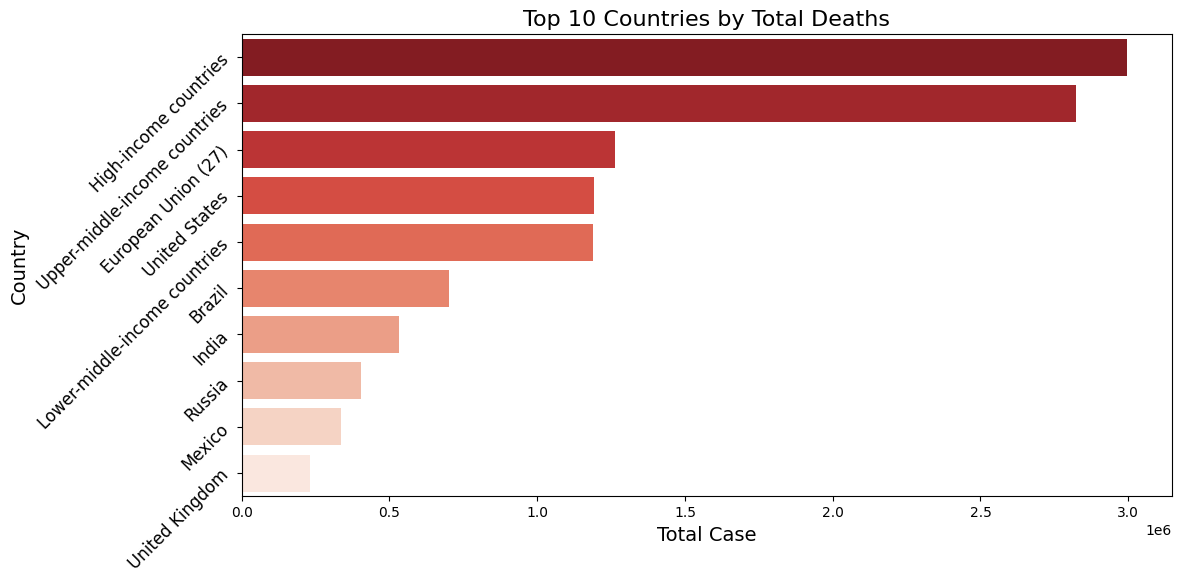

In [12]:
# Sort the latest data by 'total_deaths' in descending order and select the top 10 countries
top10_deaths = latest_df.sort_values('total_deaths', ascending=False).head(10)

# Set the figure size for the plot
plt.figure(figsize=(12,6))

# Create a horizontal barplot showing total deaths for the top 10 countries
sns.barplot(x="total_deaths", y="location", data=top10_deaths, palette='Reds_r')

# Set the title and axis labels with font sizes
plt.title("Top 10 Countries by Total Deaths", fontsize=16)
plt.xlabel("Total Case", fontsize=14)
plt.ylabel("Country", fontsize=14)

# Rotate the country names (y-axis labels) by 45 degrees for better readability
plt.yticks(rotation=45, fontsize=12)

# Display the plot
plt.show()

📌 3. What is the trend of total cases over time globally?

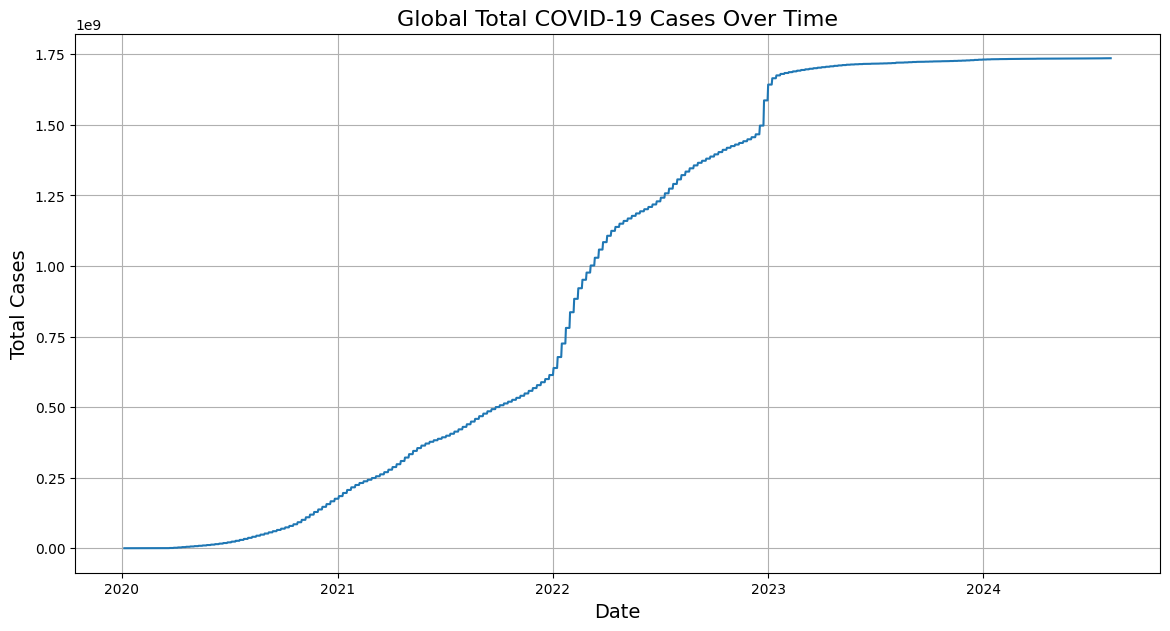

In [13]:
# Group the dataset by 'date' and calculate the sum of 'total_cases' for each date to get the global trend
global_trend = df.groupby('date')[['total_cases']].sum()

# Set the figure size for the line plot
plt.figure(figsize=(14,7))

# Create a line plot showing the global total COVID-19 cases over time
sns.lineplot(data=global_trend, x=global_trend.index, y='total_cases')

# Set the title and axis labels with appropriate font sizes
plt.title("Global Total COVID-19 Cases Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Cases", fontsize=14)

# Add gridlines to the plot for better readability
plt.grid(True)

# Display the plot
plt.show()

📌 4. How did vaccination progress globally?

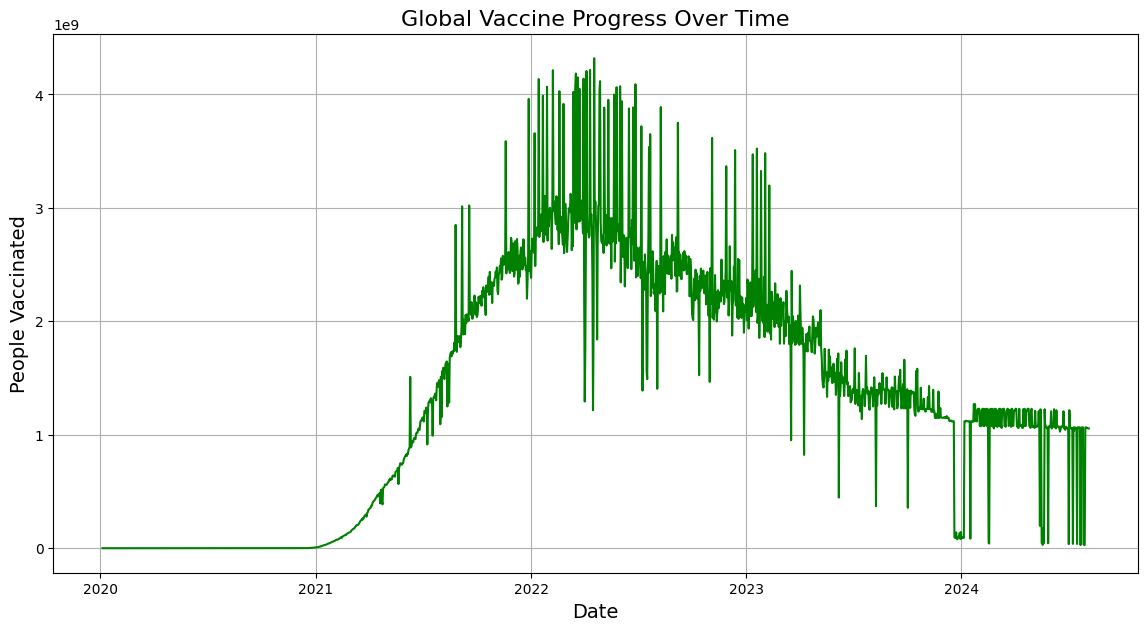

In [14]:
# Group the dataset by 'date' and calculate the sum of 'people_vaccinated' for each date to get the global vaccination trend
global_vaccine = df.groupby('date')[['people_vaccinated']].sum()

# Set the figure size for the line plot
plt.figure(figsize=(14,7))

# Create a line plot showing the global vaccination progress over time
sns.lineplot(data=global_vaccine, x=global_vaccine.index, y='people_vaccinated', color='green')

# Set the title and axis labels with appropriate font sizes
plt.title('Global Vaccine Progress Over Time', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("People Vaccinated", fontsize=14)

# Add gridlines to the plot for better readability
plt.grid(True)

# Display the plot
plt.show()

📌 5. Mortality rate (deaths per case) comparison between countries?

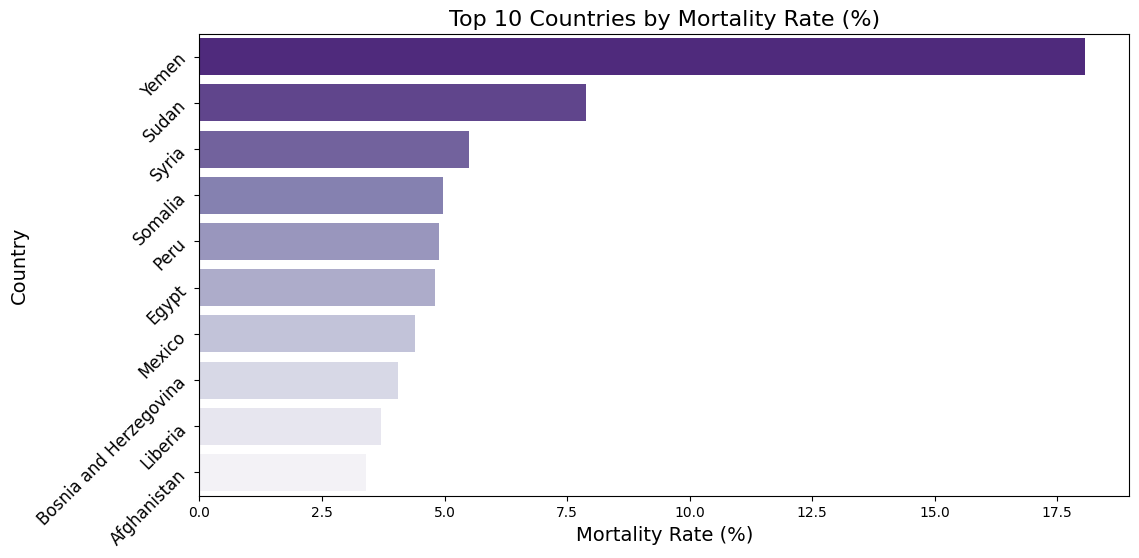

In [15]:
latest_df['mortality_rate'] = (latest_df['total_deaths'] / latest_df['total_cases']) * 100

top10_mortality = latest_df.sort_values('mortality_rate', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='mortality_rate', y='location', data=top10_mortality, palette='Purples_r')
plt.title("Top 10 Countries by Mortality Rate (%)", fontsize=16)
plt.xlabel("Mortality Rate (%)", fontsize=14)
plt.ylabel('Country', fontsize=14)

plt.yticks(rotation=45, fontsize=12)
plt.show()

📌 6. New cases trend in a particular country (e.g., India)

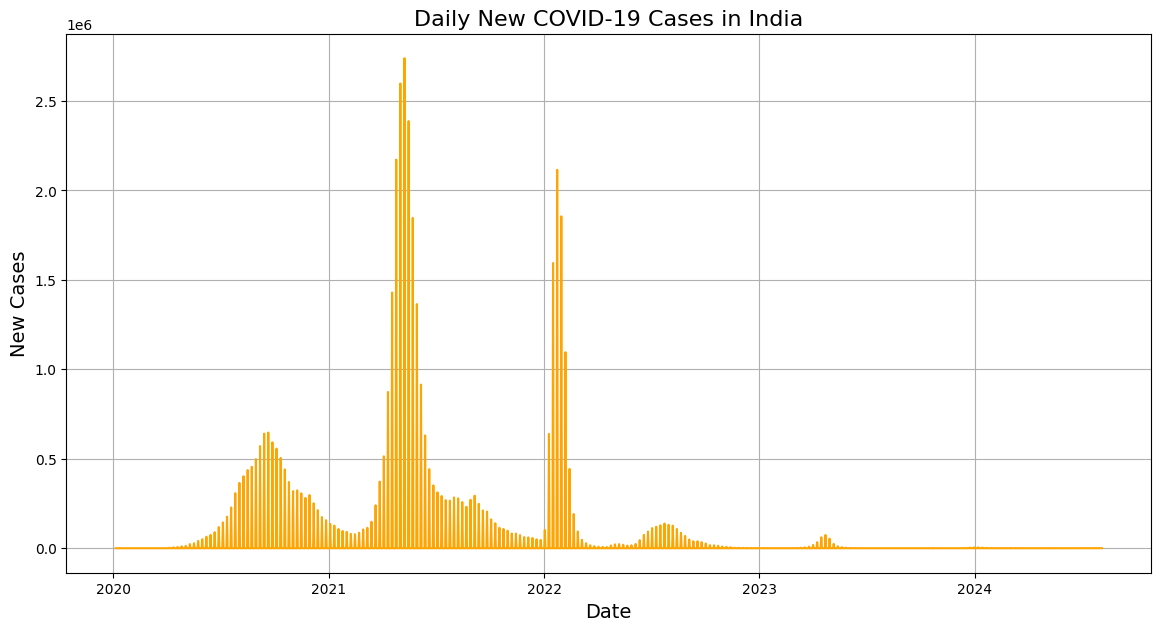

In [16]:
# Filter the dataset to include only data for India
india_df = df[df['location'] == 'India']

# Set the figure size for the line plot
plt.figure(figsize=(14,7))

# Create a line plot showing daily new COVID-19 cases in India over time
sns.lineplot(data=india_df, x='date', y='new_cases', color='orange')

# Set the title and axis labels with appropriate font sizes
plt.title("Daily New COVID-19 Cases in India", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel('New Cases', fontsize=14)

# Add gridlines to the plot for better readability
plt.grid(True)

# Display the plot
plt.show()

📌 7. Fully Vaccinated vs Population Percentage - Top Countries?

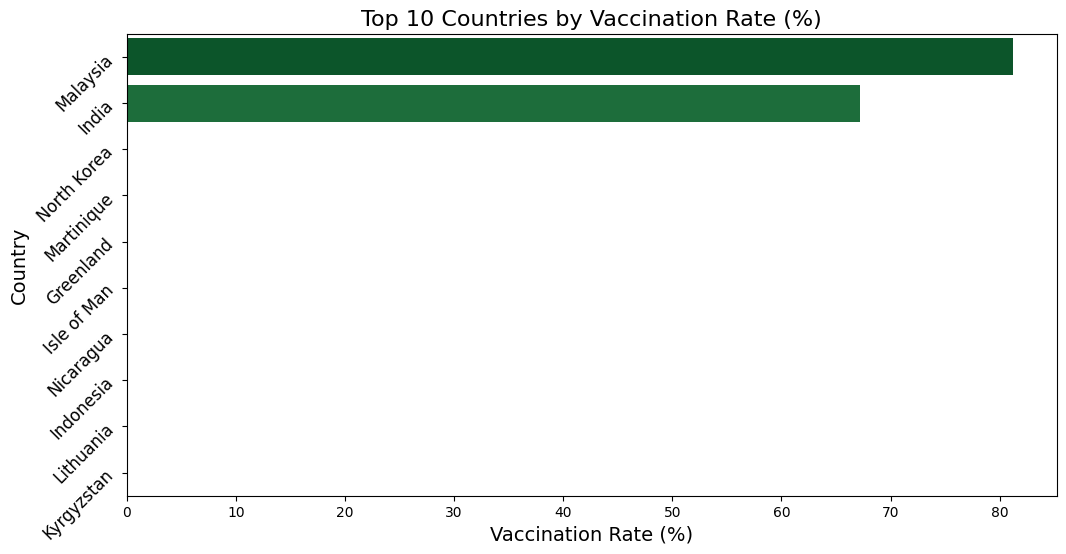

In [17]:
# Create a new column 'vaccination_rate' by calculating the percentage of fully vaccinated people in the population
latest_df['vaccination_rate'] = (latest_df['people_fully_vaccinated'] / latest_df['population']) * 100

# Sort the data by 'vaccination_rate' in descending order and select the top 10 countries
top10_vaccinated = latest_df.sort_values('vaccination_rate', ascending=False).head(10)

# Set the figure size for the bar plot
plt.figure(figsize=(12,6))

# Create a horizontal barplot showing the top 10 countries by vaccination rate
ax = sns.barplot(x='vaccination_rate', y='location', data=top10_vaccinated, palette='Greens_r')

# Set the title and axis labels with appropriate font sizes
plt.title('Top 10 Countries by Vaccination Rate (%)', fontsize=16)
plt.xlabel('Vaccination Rate (%)', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Rotate the country names (y-axis labels) by 45 degrees and set their font size
plt.yticks(rotation=45, fontsize=12)

# Display the plot
plt.show()

📌 8. Relationship between Vaccination and Cases (Plotly Scatter Plot)

In [18]:
# Create a scatter plot using Plotly with 'people_fully_vaccinated' on the x-axis and 'total_cases' on the y-axis
fig = px.scatter(latest_df, 
                 x='people_fully_vaccinated',  # x-axis: number of people fully vaccinated
                 y='total_cases',              # y-axis: total number of COVID-19 cases
                 color='location',             # Color the points based on the country (location)
                 size='total_deaths',  # Points will size based on total deaths
                 hover_name='location',       # Display the country name when hovering over a point
                 hover_data=['total_deaths', 'people_vaccinated'],  # Display additional data on hover: total deaths and people vaccinated
                 title='People Fully Vaccinated vs Total Cases',  # Set the plot title
                 labels={                     # Custom labels for the axes and hover data
                     'location': 'Country', 
                     'people_fully_vaccinated': 'People Fully Vaccinated',
                     'total_cases': 'Total Cases',
                     'total_deaths': 'Total Deaths',
                     'people_vaccinated': 'People Vaccinated'
                 },
                 template='plotly_dark')      # Set the plot template to 'plotly_dark' for a dark theme

# Display the plot
fig.show()

📌 9. Interactive World Map - Total Cases (Plotly)

In [19]:
# Create a choropleth map using Plotly to visualize total COVID-19 cases worldwide by country
fig = px.choropleth(latest_df,
                    locations='location',  # 'location' column contains the country names
                    locationmode='country names',  # Use country names for the location mode
                    color='total_cases',  # Color the countries based on the total number of COVID-19 cases
                    hover_name='location',  # Display the country name when hovering over a country on the map
                    color_continuous_scale='Reds',  # Set the color scale to a red gradient for better visibility of cases
                    labels={"total_cases": "Total Cases", "location": "Country"},  # Custom labels for the hover data and axis
                    title='Total COVID-19 Cases Worldwide',  # Set the title of the map
                   )

# Update the layout to adjust the figure size, font size of the title, and center the title
fig.update_layout(
    width=1000,  # Set the width of the plot to 1000px for better visibility
    height=600,  # Set the height of the plot to 600px for better visibility
    title_font_size=20,  # Increase the title font size to 20 for better visibility
    title_x = 0.5  # Center align the title (0.5 is the center of the plot area)
)

# Display the choropleth map
fig.show()

📌 10. Interactive World Map - Vaccination Progress (Plotly)

In [20]:
# Create a choropleth map using Plotly to visualize global vaccination progress by country
fig = px.choropleth(latest_df,
                    locations='location',                          # 'location' column contains the country names
                    locationmode='country names',                  # Use country names for the location mode
                    color='people_fully_vaccinated',               # Color the countries based on the number of people fully vaccinated
                    hover_name='location',                         # Display country name on hover
                    color_continuous_scale='Greens',               # Set the color scale to a green gradient for better visibility
                    labels={"people_fully_vaccinated": "People Fully Vaccinated", "location": "Country"},  # Custom labels for hover data
                    title='Global Vaccination Progress'            # Set the title of the map
                   )

# Update the layout to increase the figure size, change title font size, align title to center, and reduce bottom margin
fig.update_layout(
    width = 1000,  # Set the width to 1000px
    height = 600,  # Set the height to 600px
    title_font_size = 20,  # Increase the title font size to 20 for better visibility
    title_x = 0.5,  # Align the title to the center (0.5 is the center of the plot)
    margin=dict(b=20)  # Decrease the bottom margin of the plot (b=20)
)

# Display the choropleth map
fig.show()